<a href="https://colab.research.google.com/github/hyperdbio/Android-inject/blob/master/ex04_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.DataFrame(
    {

      '시간' : [2, 4,8 ,9],
      '성적' : [20, 40, 80, 90]

    }
)

data

,시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


### w와 b를 찾는 방법
- 최소제곱법 : 수학적 공식을 이용한 해를 한번에 구함
- 경사하강법 : w와 b값의 변화에 따른 오차(loss)값의 기울기를 이용하여 찾는 방법


최소제곱법이 적용된 sklearn 모델 사용해보기!

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# 모델 초기화(생성)
lr_rg = LinearRegression() # 조정해줄 하이퍼파라미터가 없음!

In [6]:
# 문제데이터
data['시간']

,시간
0,2
1,4
2,8
3,9


In [7]:
# 정답데이터
data['성적']

,성적
0,20
1,40
2,80
3,90


In [8]:
# 학습
lr_rg.fit(data[['시간']], data['성적'])

LinearRegression()

In [11]:
# 예측
lr_rg.predict([[7]])

array([70.])

In [12]:
temp = pd.DataFrame(
    {
        '시간' : [7]
    }
)

In [13]:
lr_rg.predict(temp)

array([70.])

In [14]:
# 가중치(w) 확인
lr_rg.coef_

array([10.])

In [15]:
# 절편(b) 확인
lr_rg.intercept_

np.float64(7.105427357601002e-15)

In [16]:
# 회귀식 출력
print(f'성적 = {lr_rg.coef_[0]} * 시간 + {lr_rg.intercept_}')

성적 = 9.999999999999998 * 시간 + 7.105427357601002e-15


#### 경사하강법(GD, Gradient Descent)
1. 파라미터(w, b) 초기화 : 임의의 값으로 초기화
2. 예측 : 현재 w와 b를 사용해서 예측을 수행 $\hat{y}=wx+b$
3. 오차 계산 : 예측값과 실제값 사이의 오차를 계산(MSE, Mean_Squared_Error)
4. 기울기 계산 : Loss값이 낮아지는 <b>방향</b>을 찾기 위해서 w와 Loss값 간의 기울기 값을 계산
5. 파라미터 업데이트 : 기울기와 <b>학습률(Learning rate, α)</b>을 사용해서 파라미터(w, b)를 업데이트

In [18]:
# 가설함수 정의
# 예측값
def h(w, x) :
  return w * x + 0

In [23]:
# MSE(평균제곱오차) : 손실함수, 비용함수
def cost(data, target, weight) : # 특성(시간)
  y_pred = h(weight, data) # 예측값(위에서 정의한 h 함수 사용)
  mse = ((target - y_pred)**2).mean() # 오차제곱의 평균
  return mse

In [26]:
# MSE
cost(data['시간'], data['성적'],10)

np.float64(0.0)

- w값에 따른 mse 변화율 시각화

In [27]:
# x축의 범위
w_arr = range(-10, 31) # -10 ~ 30

In [29]:
cost_list = [] # 비용함수 (MSE)를 담아줄 빈 리스트
for w in w_arr :
  c = cost(data['시간'], data['성적'], w)
  cost_list.append(c)

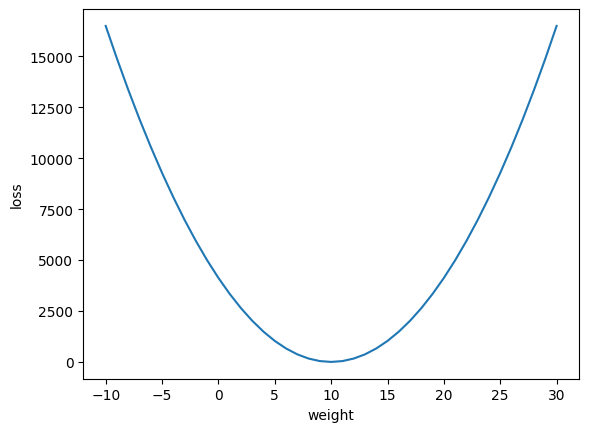

In [30]:
# 시각화
plt.plot(w_arr, cost_list)
plt.xlabel('weight')
plt.ylabel('loss') # cost

plt.show()

In [31]:
# 모델 사용해보기!
from sklearn.linear_model import SGDRegressor # 경사하강법

In [35]:
# 모델 초기화(생성)
sgd_rg = SGDRegressor(
  eta0 = 0.01, # 학습률(기울기의 보폭)
  max_iter = 5000, # w값 업데이트 횟수 최대 5000으로 제한
  verbose = 1 # 학습 진행 현황 출력


)



In [36]:
# 학습
sgd_rg.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 8.92, NNZs: 1, Bias: 1.101983, T: 4, Avg. loss: 926.737253
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.60, NNZs: 1, Bias: 1.199155, T: 8, Avg. loss: 9.937324
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.76, NNZs: 1, Bias: 1.214055, T: 12, Avg. loss: 0.899245
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.81, NNZs: 1, Bias: 1.217313, T: 16, Avg. loss: 0.234643
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.82, NNZs: 1, Bias: 1.213543, T: 20, Avg. loss: 0.163976
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.84, NNZs: 1, Bias: 1.210979, T: 24, Avg. loss: 0.157413
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.83, NNZs: 1, Bias: 1.206037, T: 28, Avg. loss: 0.152554
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.84, NNZs: 1, Bias: 1.202983, T: 32, Avg. loss: 0.152690
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.83, NNZs: 1, Bias: 1.198228, T: 36, Avg. loss: 0.149953
Total training time: 0.00 seconds.
-- Epoch 1

SGDRegressor(max_iter=5000, verbose=1)

In [38]:
# 가중치와 절편 확인
sgd_rg.coef_, sgd_rg.intercept_

(array([9.85321092]), array([1.07402638]))

In [41]:
# 성능 확인
sgd_rg.score(data[['시간']], data['성적'])
# 회귀 평가 지표(오차값, 데이터의 분포를 얼마나 잘 이해(표현)하고 있는가?)

## 분류 평가 지표 : 얼마나 잘 맞췄는가

# R2 score : 0~1사이의 값, 1에 가까울수록 데이터의 분포를 잘 이해하고 있다!


0.9997199250564492